<a href="https://colab.research.google.com/github/Datriks/Python-for-Finance/blob/master/Rbs_High_Volatility_Investigating_stylized_facts_of_asset_returns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# import the necessary libraries
import pandas as pd 
import numpy as np
from pandas_datareader import data as wb
import seaborn as sns 
import scipy.stats as scs
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [0]:
# download the S&P 500 and calculate the return
df = wb.DataReader('RBS.L', data_source='yahoo',start='2011-1-1')
df = df[['Adj Close']].rename(columns={'Adj Close':'adj_close'})

In [0]:
# calculate the log returns
df['log_rtn'] = np.log(df.adj_close/df.adj_close.shift(1))
df = df[['adj_close','log_rtn']].dropna(how='any')

In [33]:
df.head()

,adj_close,log_rtn
Date,,
2011-01-05,357.261383,0.006615
2011-01-06,353.248199,-0.011297
2011-01-07,349.845703,-0.009679
2011-01-10,344.611115,-0.015076
2011-01-11,351.241608,0.019058


In [0]:
#non Gaussian distribution of returns
# calculate the normal probaility distribution using the mean and stad dev of the 
#observed returns
r_range = np.linspace(min(df.log_rtn),max(df.log_rtn), num=1000)
mu = df.log_rtn.mean()
sigma = df.log_rtn.std()
norm_pdf = scs.norm.pdf(r_range, loc = mu, scale=sigma)

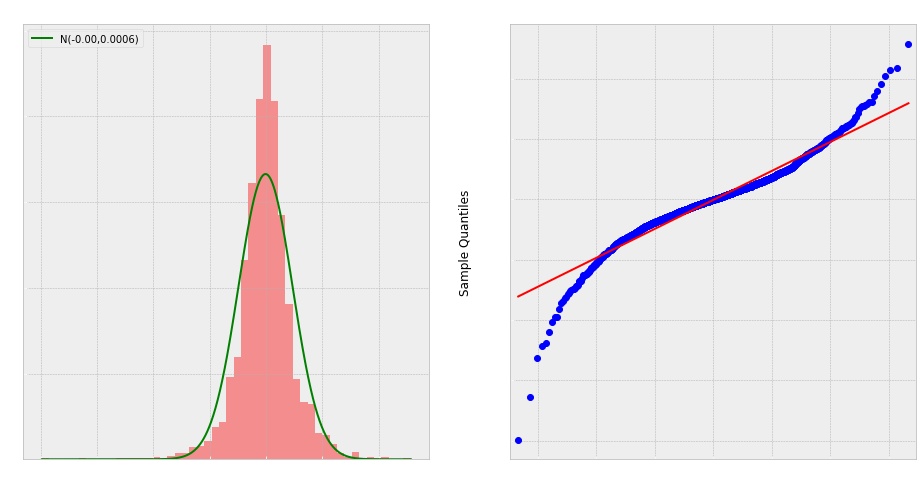

In [47]:
# plot the histogram snd the Q -Q plot
fig, ax = plt.subplots(1,2, figsize=(16,8))

# histogram
sns.distplot(df.log_rtn, kde = False, norm_hist=True, ax=ax[0], color='red')
ax[0].set_title('Distribution of RBS.L', fontsize=16,color='white')
ax[0].plot(r_range, norm_pdf, 'g',lw=2, label=f'N({mu:.2f},{sigma**2:.4f})')
ax[0].legend(loc='upper left')

ax[0].tick_params(axis='x', colors='white')
ax[0].tick_params(axis='y', colors='white')
ax[0].xaxis.label.set_color('white')


# Q -Q plot
qq = sm.qqplot(df.log_rtn.values, line='s', ax=ax[1])
ax[1].set_title('Q -Q plot', fontsize = 16,color='white')

ax[1].tick_params(axis='x', colors='white')
ax[1].tick_params(axis='y', colors='white')
ax[1].xaxis.label.set_color('white')

plt.show()

In [39]:
#print a summary statistics of the log returns
jb_test = scs.jarque_bera(df.log_rtn.values)

print('---------- RBS.L--Descriptive Statistics ----------')
print('Range of dates:', min(df.index.date), '-', max(df.index.date))
print('Number of observations:', df.shape[0])
print(f'Mean: {df.log_rtn.mean():.4f}')
print(f'Median: {df.log_rtn.median():.4f}')
print(f'Min: {df.log_rtn.min():.4f}')
print(f'Max: {df.log_rtn.max():.4f}')
print(f'Standard Deviation: {df.log_rtn.std():.4f}')
print(f'Skewness: {df.log_rtn.skew():.4f}')
print(f'Kurtosis: {df.log_rtn.kurtosis():.4f}') 
print(f'Jarque-Bera statistic: {jb_test[0]:.2f} with p-value: {jb_test[1]:.2f}')

---------- RBS.L--Descriptive Statistics ----------
Range of dates: 2011-01-05 - 2020-06-09
Number of observations: 2376
Mean: -0.0004
Median: -0.0003
Min: -0.1990
Max: 0.1286
Standard Deviation: 0.0240
Skewness: -0.4546
Kurtosis: 5.6742
Jarque-Bera statistic: 3252.94 with p-value: 0.00


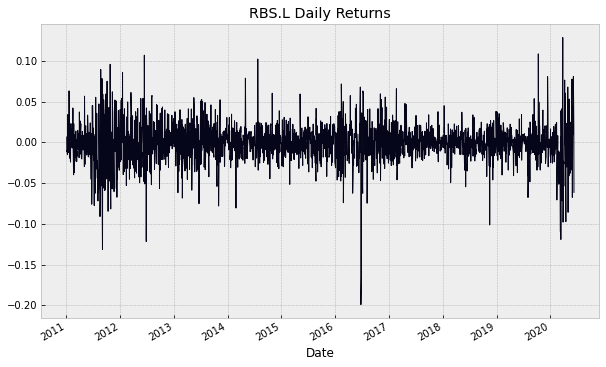

In [50]:
# volatility clustering
# log returns values clustering
df.log_rtn.plot(title='RBS.L Daily Returns',
                figsize=(10,6),
                lw=1,
                color='#06061A')
plt.show()

In [0]:
#absence of autocorelatiion in returns
#define the params for creating the autocorelation plots:
N_lags = 50
significance_level = 0.05

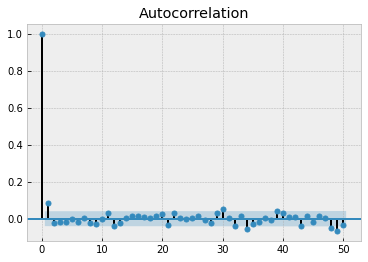

In [53]:
# create the ACF plot of log returns:
acf = smt.graphics.plot_acf(df.log_rtn,
                            lags=N_lags,
                            alpha=significance_level)
plt.show()

In [0]:
# leverage effect
# calc volatility as moving standard deviations
df['moving_std_252'] = df[['log_rtn']].rolling(window=252).std()
df['moving_std_21'] = df[['log_rtn']].rolling(window=21).std()
df['moving_std_40'] = df[['log_rtn']].rolling(window=40).std()

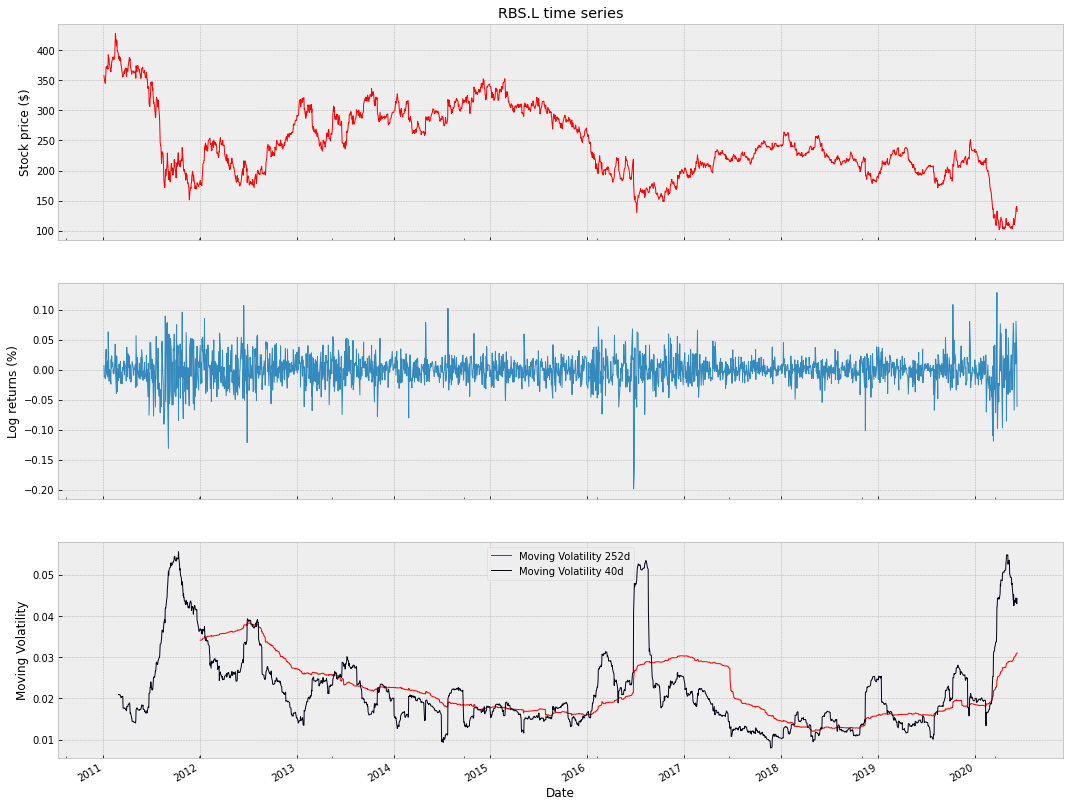

In [66]:
#plot all the series
fig, ax = plt.subplots(3, 1, figsize=(18, 15), 
                       sharex=True)

df.adj_close.plot(ax=ax[0],lw=1,color='red')
ax[0].set(title='RBS.L time series',
          ylabel='Stock price ($)')

df.log_rtn.plot(ax=ax[1],lw=1)
ax[1].set(ylabel='Log returns (%)')

df.moving_std_252.plot(ax=ax[2], color='r', 
                       label='Moving Volatility 252d',lw=1)
#df.moving_std_21.plot(ax=ax[2], color='g', 
                      #label='Moving Volatility 21d',lw=1)
df.moving_std_40.plot(ax=ax[2], color='#06061A', 
                      label='Moving Volatility 40d',lw=1)
ax[2].set(ylabel='Moving Volatility',
          xlabel='Date')
ax[2].legend()
plt.show()